# **Lab 6: Optimization and Learning**
**Mirja Johnsson**

# **Abstract**

In lab 6 for *Methods in Scientific Computation* the Gradient Descent method for minimization was implemented.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**



[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



In [1]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
The Gradient Descent Minimization method takes a function in R^n and searches for its (local or hopefully global) minima by evaluating the derivatives and updating x with the negative of the direction, multiplied by the step size alpha. The logic behind this is that the derivative tells you how fast the funtion is changing in that point. If it is increasing it is likely decreasing in the opposite direction, and if it is shrinking you want to follow it. The algorithm starts on a supplied starting-value x0, evaluates the derivative at x0, and updates according to this value. 


There is a clear trade-off in performance when it comes to the step size alpha. If alpha is very small the algorithm will require many iterations before it terminates, this might be so many that it takes a considerable long time. On the other hand, if alpha is too large there is the risk that the calculation overshoots the minima and oscillates around the point but never reaches it. For this assignment it should be ok to use a fixed-length step, but this can be done more dynamically as well.


The simple version of Gradient Descentcan be improved upon by making it stochastic. This can be beneficial when the order of dimensions (n) is very high thus making it time and resource-consuming to evaluate all of them in every iteration. 


#**Method**
The function is implemented from algorithm 15.1 in the book, with a few modifications. (e.g. Alpha is static and not updated via line search.) Since the requirement is to solve functions in R^n no dimensions are specified for the function f or the initial guess x0 so the input-function can have arbitrary dimensions.

In [37]:
#ALGORITHM 15.1  
#x = gradient_descent_method(f, x0).
#Input: objective function f and initial guess x0.
#Output: solution vector x.

def gradient_descent_method(f, x0):
  x = x0
  TOL = 1e-3
  alpha = 0.1
  Df = compute_gradient(f, x)
  func_values = []
  while np.linalg.norm(Df) > TOL:
    Df = compute_gradient(f, x)
    x -= alpha*Df
    #func_values.append(x)
    func_values.append(Df)
  #end while
  #print(func_values)
  return x, func_values

#Compute the gradient by evaluating delta_x with step-size h 
def compute_gradient(f, x):
  h = 1e-6
  #n = x.shape[0]
  #gradient = np.zeros((n))
  gradient = np.zeros(x.shape[0])
  for i in range(len(gradient)):
    minus = np.copy(x)
    plus = np.copy(x)
    minus[i] -= h
    plus[i] += h
    gradient[i] = (f(plus) - f(minus)) / (h*2)
  return gradient



# **Results**
To test the functionality of the method I defined a function in R^3 where it is easy to see that the function has a minima in the point (1/3, 2, -3). To test that the function works I modified the gradient descent method to save every iterative value of the gradient to be able to plot how it increments closer to the stable point x*. 

Returned solution:  [ 0.3333044   1.99999401 -3.00029034] 

Difference to the actual solution: 
 [ 0.33333333  2.         -3.        ]  is  [2.9e-05 6.0e-06 2.9e-04]


Text(0, 0.5, 'Function gradient at step t')

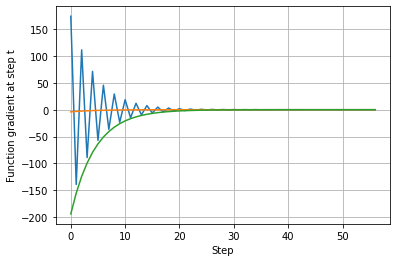

In [53]:
#Test 
def f(x):
  return (3*x[0]-1)**2 + (x[1]-2)**2 + (x[2] +3)**2

actual = np.array([1/3, 2, -3])
solution, x_vals = gradient_descent_method(f, np.array([10.0,0, -100.0]))
print("Returned solution: ", solution, "\n")
print("Difference to the actual solution: \n",actual, " is " ,np.round(np.abs(solution - actual),6))
diff = np.copy(x_vals)
#for i in range(len(x_vals)): 
 # for j in range(1,3):
  #  diff[i][j] = x_vals[i][j]-actual[j]
#print(diff)
plt.grid()

plt.plot(x_vals)
plt.xlabel("Step")
plt.ylabel("Function gradient at step t")


# **Discussion**
When setting the step-size alpha to 0.01, and the tolerance for error TOL to 10^-6 it requires more than 200 iterations to converge. When TOL is 10^-3 it finishes after ca 120 iterations.


In the plot I have increased alpha to 0.1. As we can see one of the x:es overshoots the stable point X* and oscillates around it, while converging. Under these conditions the functions stops after ca 50 iterations. 